## Mario Enrique Pisquiy Gómez
### 20200399

In [200]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import seaborn as sns

## Importar Data

In [80]:
dataLimpia = pd.read_csv('titanic.csv')
data = pd.read_csv('titanic_MD.csv')
dataMean = pd.read_csv('titanic_MD.csv')
dataMedian = pd.read_csv('titanic_MD.csv')
dataMode = pd.read_csv('titanic_MD.csv')
dataRegression = pd.read_csv('titanic_MD.csv')

In [3]:
print('titanic_MD shaple:',data.shape)
data.head()

titanic_MD shaple: (183, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000
mean,455.366120,0.672131,1.191257,35.692532,0.461111,0.461988,78.959191
std,247.052476,0.470725,0.515187,15.640858,0.646122,0.753435,77.026328
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,35.500000,0.000000,0.000000,56.929200
75%,676.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.539600
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


## Parte 1

### Inciso 1

In [5]:
data.isna().sum() #or df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

In [6]:
np.unique(data['Survived'])

array([0, 1], dtype=int64)

In [7]:
np.unique(data['Pclass'])

array([1, 2, 3], dtype=int64)

In [8]:
np.unique(data['Age'])

array([ 0.92,  2.  ,  3.  ,  4.  ,  6.  , 11.  , 14.  , 15.  , 16.  ,
       17.  , 18.  , 19.  , 21.  , 22.  , 23.  , 24.  , 25.  , 27.  ,
       28.  , 29.  , 30.  , 31.  , 32.  , 33.  , 34.  , 35.  , 36.  ,
       36.5 , 37.  , 38.  , 39.  , 40.  , 41.  , 42.  , 43.  , 44.  ,
       45.  , 46.  , 47.  , 48.  , 49.  , 50.  , 51.  , 52.  , 53.  ,
       54.  , 55.  , 56.  , 58.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 70.  , 71.  , 80.  ,   nan])

In [9]:
np.unique(data['SibSp'])

array([ 0.,  1.,  2.,  3., nan])

In [10]:
np.unique(data['Parch'])

array([ 0.,  1.,  2.,  4., nan])

In [11]:
np.unique(data['Fare'])

array([  0.    ,   5.    ,   7.65  ,   8.05  ,  10.4625,  10.5   ,
        12.475 ,  12.875 ,  13.    ,  13.7917,  16.7   ,  25.5875,
        25.9292,  26.    ,  26.2833,  26.2875,  26.3875,  26.55  ,
        27.7208,  27.75  ,  28.5   ,  28.7125,  29.7   ,  30.    ,
        30.5   ,  30.6958,  31.    ,  32.3208,  33.5   ,  34.0208,
        34.6542,  35.5   ,  38.5   ,  39.    ,  39.4   ,  39.6   ,
        40.125 ,  49.5   ,  49.5042,  50.4958,  51.4792,  51.8625,
        52.    ,  52.5542,  53.1   ,  55.    ,  55.4417,  55.9   ,
        56.9292,  57.    ,  57.9792,  61.175 ,  61.9792,  63.3583,
        66.6   ,  69.3   ,  71.    ,  71.2833,  75.25  ,  76.7292,
        77.2875,  77.9583,  78.2667,  78.85  ,  79.2   ,  79.65  ,
        81.8583,  83.1583,  83.475 ,  86.5   ,  89.1042,  90.    ,
        91.0792,  93.5   , 106.425 , 108.9   , 110.8833, 113.275 ,
       120.    , 134.5   , 135.6333, 146.5208, 151.55  , 153.4625,
       164.8667, 211.3375, 211.5   , 227.525 , 247.5208, 262.3

In [12]:
np.unique(data['Sex'])

array(['?', 'female', 'male'], dtype=object)

In [13]:
np.unique(data['Ticket'])

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '112050', '112053', '112059',
       '112277', '113043', '113050', '113051', '113055', '113501',
       '113503', '113505', '113509', '113514', '113760', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113803', '113806', '11751', '11752', '11753', '11755',
       '11765', '11767', '11769', '11771', '11813', '11967', '12749',
       '13049', '13213', '13214', '13502', '13507', '13509', '13567',
       '13568', '16966', '17421', '17453', '17463', '17465', '17466',
       '17474', '17764', '19877', '19928', '19943', '19950', '19952',
       '19996', '230080', '230136', '24160', '248698', '248733', '27042',
       '27267', '28551', '33638', '34218', '347054', '348121', '348123',
       '348124', '35273', '35281', '36928', '36947', '36963', '36967',
       '36973', '392096', '5727', '695', 'C.A. 29395', 'C.A. 34260',
       'F.C. 12750', 'PC 

In [14]:
np.unique(data['Cabin'])

array(['A10', 'A16', 'A20', 'A23', 'A24', 'A26', 'A31', 'A34', 'A36',
       'A5', 'A6', 'A7', 'B101', 'B18', 'B19', 'B20', 'B22', 'B3', 'B30',
       'B35', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50',
       'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73',
       'B77', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101',
       'C103', 'C104', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30', 'C32',
       'C45', 'C46', 'C49', 'C50', 'C52', 'C54', 'C62 C64', 'C65', 'C68',
       'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86', 'C87', 'C90',
       'C91', 'C92', 'C93', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17',
       'D19', 'D20', 'D26', 'D28', 'D30', 'D33', 'D35', 'D36', 'D37',
       'D46', 'D47', 'D48', 'D49', 'D50', 'D56', 'D6', 'D7', 'D9', 'E10',
       'E101', 'E12', 'E121', 'E17', 'E24', 'E25', 'E31', 'E33', 'E34',
       'E36', 'E38', 'E40', 'E44', 'E46', 'E49', 'E50', 'E58', 'E

In [84]:
cols = []
val = []
for col in data.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(data[col].str.contains(r'\?').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,Name,0
1,Sex,51
2,Ticket,0
3,Cabin,0
4,Embarked,0


In [81]:
data.replace(r'\?', np.nan, regex = True, inplace = True)
dataMean.replace(r'\?', np.nan, regex = True, inplace = True)
dataMedian.replace(r'\?', np.nan, regex = True, inplace = True)
dataMode.replace(r'\?', np.nan, regex = True, inplace = True)
dataRegression.replace(r'\?', np.nan, regex = True, inplace = True)

In [17]:
cols = []
val = []
for col in data.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(data[col].str.contains(r'\?').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,Name,0
1,Sex,0
2,Ticket,0
3,Cabin,0
4,Embarked,0


In [154]:
data.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

### Inciso 2

**Survived:** En esta columna no hay ningún missing value

**Pclass:** En esta columna no hay ningún missing value

**Name:** En esta columna no hay ningún missing value

**Sex:** Para esta columna pienso realizar una imputación sectorizada según la columna survived, pues es más probable que una mujer sobreviviera que un hombe

**Age:** Para esta columna considero que utilizr una regresión lineal, utilizando Fare para la predicción del modelo

**SibSp:** Para esta columna pienso utilizar una inserción por promedio de la columna, aproximando el valor hacia abajo, porque es un número exacto

**Parch:** Similar a SibSp pienso utilizar una inserción por promedio de la columna, aproximando el valor hacia abajo, porque es un número exacto

**Ticket:** En esta columna no hay ningún missing values

**Fare:** En esta columna pienso utilizar una imputación sectorizada de la media según clase, pues es el costo promedio de que se pagaba según la clase y parte del barco en la que el pasajero estaba (1 para la más alta, 2 para media y 3 para clase baja)

**Cabin:**  En esta columna no hay ningún missing values

**Embarked:** Para esta columna pienso utilizar una imputación según la moda, pues al ser vuna variable categórica de texto (Char) es lo que considero más práctico. 

### Incico 3

In [144]:
contador = 0
for ind in data.index:
        if isNaN(data['Sex'][ind]) == False and isNaN(data['Age'][ind]) == False and isNaN(data['SibSp'][ind]) == False and isNaN(data['Parch'][ind]) == False and isNaN(data['Fare'][ind]) == False and isNaN(data['Embarked'][ind]) == False:
            contador += 1
print("En total hay " + str(contador) + " filas completas")        

En total hay 100 filas completas


### Inciso 4

In [46]:
def isNaN(value):
    return value != value

In [100]:
def regression(column1, column2):
    dataRegression[column1].fillna(dataRegression[column1].mean(), inplace=True)
    dataRegression[column2].fillna(dataRegression[column2].mean(), inplace=True)
    lm = LinearRegression()
    lm = lm.fit(dataRegression[[column2]], dataRegression[column1])
    dataRegression[column1+"_lm"] = lm.predict(dataRegression[[column2]])

In [48]:
def getMean(column):
    return data[column].mean()

In [49]:
def getMedian(column):
    return data[column].median()

In [50]:
def getMode(column):
    return data[column].mode

**Imputación por mediana** *No incluiré las variables categoricas de texto (Sex, Embarked)*

In [82]:
dataMean.loc[dataMean["Age"].isna(), "Age"] = getMean('Age')

In [83]:
dataMean.loc[dataMean["SibSp"].isna(), "SibSp"] = math.floor(getMean('SibSp'))

In [84]:
dataMean.loc[dataMean["Parch"].isna(), "Parch"] = math.floor(getMean('Parch'))

In [85]:
dataMean.loc[dataMean["Fare"].isna(), "Fare"] = getMean('Fare')

In [86]:
dataMean.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked       12
dtype: int64

**Imputación por mediana** *No incluiré las variables categoricas de texto (Sex, Embarked)*

In [87]:
dataMedian.loc[dataMedian["Age"].isna(), "Age"] = getMedian('Age')

In [88]:
dataMedian.loc[dataMedian["SibSp"].isna(), "SibSp"] = math.floor(getMedian('SibSp'))

In [89]:
dataMedian.loc[dataMedian["Parch"].isna(), "Parch"] = math.floor(getMedian('Parch'))

In [90]:
dataMedian.loc[dataMedian["Fare"].isna(), "Fare"] = getMedian('Fare')

In [91]:
dataMedian.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked       12
dtype: int64

**Imputación por moda**  *No incluiré las variables numericas (Age, SipSp, Parch, Fare)*

In [92]:
dataMode.loc[dataMode["Sex"].isna(), "Sex"] = getMode('Sex')

In [121]:
dataMode.loc[dataMode["Embarked"].isna(), "Embarked"] = getMode('Embarked')

In [122]:
dataMode.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked        0
dtype: int64

**Imputación por predicción: Regresión Lineal**  No incluiré las variables categoricas de texto (Sex, Embarked)

In [101]:
regression('Age','Fare')

In [104]:
regression('SibSp','Age')

In [169]:
regression('Parch','Age')

In [170]:
dataRegression.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked       12
Age_lm          0
SibSp_lm        0
Parch_lm        0
dtype: int64

**Fare se vió afectada por la primera regresión**

In [112]:
data.loc[data["Age"].isna(), "Age"] = getMean('Age')

In [114]:
data.loc[data["SibSp"].isna(), "SibSp"] = math.floor(getMean('SibSp'))

In [116]:
data.loc[data["Parch"].isna(), "Parch"] = math.floor(getMean('Parch'))

In [117]:
data.loc[data["Fare"].isna(), "Fare"] = getMean('Fare')

In [118]:
data.loc[data["Sex"].isna(), "Sex"] = getMode('Sex')

In [123]:
data.loc[data["Embarked"].isna(), "Embarked"] = getMode('Age')

In [124]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Outliers** 

**Columna: Age**

In [131]:
f = 2
xl = data['Age'].mean() - (data['Age'].std() * f)
xu = data['Age'].mean() + (data['Age'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: 6.6386145117183375
Upper value: 64.74644877942094


<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

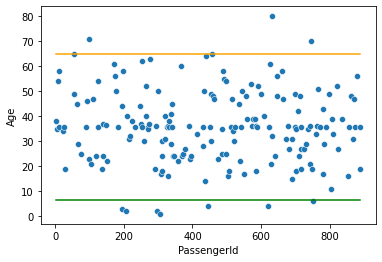

In [132]:
sns.scatterplot(x = data['PassengerId'], y = data['Age'])
sns.lineplot(x = data['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = data['PassengerId'], y = xu, color = 'orange')

In [133]:
df_sd = data[(data['Age']>=xl) & (data['Age']<=xu)]

In [134]:
df_sd[['Age']].describe()

,Age
count,171.000000
unique,50.000000
top,35.692532
freq,25.000000


Now we need to ***cap*** the values in the limits

In [136]:
data['Age_sd'] = np.where(
    data['Age']<xl,
    xl,
    np.where(
        data['Age']>xu,
        xu,
        data['Age']
    )
)

In [137]:
data[['Age', 'Age_sd']].describe()

,Age,Age_sd
count,183.000000,183.000000
unique,59.000000,52.000000
top,35.692532,35.692532
freq,25.000000,25.000000


**Columna: SibSp**

In [138]:
f = 2
xl = data['SibSp'].mean() - (data['SibSp'].std() * f)
xu = data['SibSp'].mean() + (data['SibSp'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: -0.833366130510067
Upper value: 1.7404699556466792


<AxesSubplot:xlabel='PassengerId', ylabel='SibSp'>

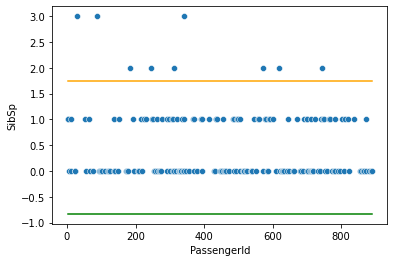

In [139]:
sns.scatterplot(x = data['PassengerId'], y = data['SibSp'])
sns.lineplot(x = data['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = data['PassengerId'], y = xu, color = 'orange')

In [140]:
df_sd = data[(data['SibSp']>=xl) & (data['SibSp']<=xu)]

In [141]:
df_sd[['SibSp']].describe()

,SibSp
count,174.000000
mean,0.356322
std,0.480294
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Now we need to ***cap*** the values in the limits

In [142]:
data['SibSp_sd'] = np.where(
    data['SibSp']<xl,
    xl,
    np.where(
        data['SibSp']>xu,
        xu,
        data['SibSp']
    )
)

In [143]:
data[['SibSp', 'SibSp_sd']].describe()

,SibSp,SibSp_sd
count,183.000000,183.000000
mean,0.453552,0.424395
std,0.643459,0.556198
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,1.740470


**Columna: Parch**

In [144]:
f = 2
xl = data['Parch'].mean() - (data['Parch'].std() * f)
xu = data['Parch'].mean() + (data['Parch'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: -1.0425998434772266
Upper value: 1.9059878216193031


<AxesSubplot:xlabel='PassengerId', ylabel='Parch'>

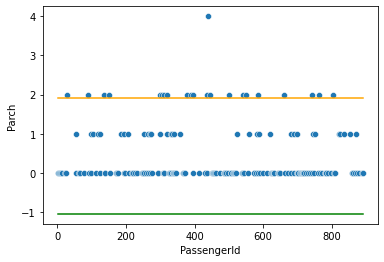

In [145]:
sns.scatterplot(x = data['PassengerId'], y = data['Parch'])
sns.lineplot(x = data['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = data['PassengerId'], y = xu, color = 'orange')

In [146]:
df_sd = data[(data['Parch']>=xl) & (data['Parch']<=xu)]

In [147]:
df_sd[['Parch']].describe()

,Parch
count,161.000000
mean,0.204969
std,0.404938
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Now we need to ***cap*** the values in the limits

In [148]:
data['Parch_sd'] = np.where(
    data['Parch']<xl,
    xl,
    np.where(
        data['Parch']>xu,
        xu,
        data['Parch']
    )
)

In [149]:
data[['Parch', 'Parch_sd']].describe()

,Parch,Parch_sd
count,183.000000,183.000000
mean,0.431694,0.409463
std,0.737147,0.672210
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,4.000000,1.905988


**Columna: Fare**

In [150]:
f = 2
xl = data['Fare'].mean() - (data['Fare'].std() * f)
xu = data['Fare'].mean() + (data['Fare'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: -71.66964557180023
Upper value: 229.58802728608583


<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

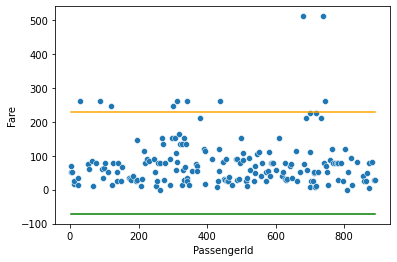

In [151]:
sns.scatterplot(x = data['PassengerId'], y = data['Fare'])
sns.lineplot(x = data['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = data['PassengerId'], y = xu, color = 'orange')

In [152]:
df_sd = data[(data['Fare']>=xl) & (data['Fare']<=xu)]

In [153]:
df_sd[['Fare']].describe()

,Fare
count,173.000000
mean,65.624751
std,46.153119
min,0.000000
25%,29.700000
50%,56.929200
75%,83.158300
max,227.525000


Now we need to ***cap*** the values in the limits

In [154]:
data['Fare_sd'] = np.where(
    data['Fare']<xl,
    xl,
    np.where(
        data['Fare']>xu,
        xu,
        data['Fare']
    )
)

In [155]:
data[['Fare', 'Fare_sd']].describe()

,Fare,Fare_sd
count,183.000000,183.000000
mean,78.959191,74.584493
std,75.314418,58.390871
min,0.000000,0.000000
25%,30.000000,30.000000
50%,61.175000,61.175000
75%,90.000000,90.000000
max,512.329200,229.588027


###  Inciso 5

**Columna Age**

In [160]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['Age'][ind] - dataMean['Age'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: -0.13253164556962674


In [161]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['Age'][ind] - dataMedian['Age'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: 0.06


In [162]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['Age'][ind] - dataRegression['Age_lm'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: -0.018105416061428903


**Columna SibSp**

In [163]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['SibSp'][ind] - dataMean['SibSp'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: 1.0


In [164]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['SibSp'][ind] - dataMedian['SibSp'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: 1.0


In [165]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['SibSp'][ind] - dataRegression['SibSp_lm'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: 0.0033697632058287785


**Columna Parch**

In [166]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['Parch'][ind] - dataMean['Parch'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: 1.3333333333333333


In [167]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['Parch'][ind] - dataMedian['Parch'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: 1.3333333333333333


In [171]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['Parch'][ind] - dataRegression['Parch_lm'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: 0.013421531972006462


**Columna Fare**

In [172]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['Fare'][ind] - dataMean['Fare'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: -6.330015857142826


In [173]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['Fare'][ind] - dataMedian['Fare'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: 15.699974999999998


In [174]:
sumaError = 0
numErrores = 0
for ind in dataLimpia.index:
    num = dataLimpia['Fare'][ind] - dataRegression['Fare'][ind]
    sumaError += num
    if num != 0:
        numErrores += 1
print("El error absoluto promedio es: " + str(sumaError/numErrores))

El error absoluto promedio es: -6.330015857142826


**Columna Age:** En esta columna el método que tuvo un error absoluto promedio fue la regresión lineal

**Columna SibSp:** En esta columna el método que tuvo un error absoluto promedio fue la regresión lineal

**Columna Parch:** En esta columna el método que tuvo un error absoluto promedio fue la regresión lineal

**Columna Fare:** En esta columna el método que tuvo un error absoluto promedio fue el input por media

### Inciso 6

Depende mucho del tipo de data y que sea lo que la acompañe de lo que va a depender el éxito en las imputaciones de data en los valores faltantes. Por ejemplo, en las regresiones, se debe de hallar una columna adecuada y que haga sentido con la que se quiere predecir la data para poder hacer una buena regresión. En este caso, las regresiones salieron bastante bien, pero también pudieron haber resultado no tan bien

## Parte 2

### Inciso 1

**Standarization**

In [188]:
scaler = StandardScaler()
df_z1 = data.copy()
for col in df_z1.select_dtypes(include=['float', 'int']).columns:
    df_z1[col+'_z'] = scaler.fit_transform(df_z1[[col]])

In [189]:
df_z1.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,SibSp_sd,Parch_sd,Fare_sd,PassengerId_z,Survived_z,Pclass_z,SibSp_z,Parch_z,Fare_z,SibSp_sd_z,Parch_sd_z,Fare_sd_z
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,455.366120,0.672131,1.191257,0.453552,0.431694,78.959191,0.424395,0.409463,74.584493,-2.499519e-16,2.062709e-17,4.307423e-17,3.033396e-17,1.092023e-17,1.480297e-16,1.710835e-16,-6.794808e-17,5.824121e-17
std,247.052476,0.470725,0.515187,0.643459,0.737147,75.314418,0.556198,0.672210,58.390871,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.840135e+00,-1.431782e+00,-3.722562e-01,-7.067991e-01,-5.872348e-01,-1.051270e+00,-7.651214e-01,-6.108010e-01,-1.280836e+00
25%,263.500000,0.000000,1.000000,0.000000,0.000000,30.000000,0.000000,0.000000,30.000000,-7.787516e-01,-1.431782e+00,-3.722562e-01,-7.067991e-01,-5.872348e-01,-6.518474e-01,-7.651214e-01,-6.108010e-01,-7.656473e-01
50%,457.000000,1.000000,1.000000,0.000000,0.000000,61.175000,0.000000,0.000000,61.175000,6.631637e-03,6.984303e-01,-3.722562e-01,-7.067991e-01,-5.872348e-01,-2.367804e-01,-7.651214e-01,-6.108010e-01,-2.302805e-01
75%,676.000000,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,1.000000,90.000000,8.955150e-01,6.984303e-01,-3.722562e-01,8.515651e-01,7.730686e-01,1.469984e-01,1.037732e+00,8.809113e-01,2.647297e-01
max,890.000000,1.000000,3.000000,3.000000,4.000000,512.329200,1.740470,1.905988,229.588027,1.764104e+00,6.984303e-01,3.520480e+00,3.968293e+00,4.853979e+00,5.769930e+00,2.372691e+00,2.232384e+00,2.661868e+00


In [190]:
scaler = StandardScaler()
df_z2 = dataLimpia.copy()
for col in df_z2.select_dtypes(include=['float', 'int']).columns:
    df_z2[col+'_z'] = scaler.fit_transform(df_z2[[col]])

In [191]:
df_z2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId_z,Survived_z,Pclass_z,Age_z,SibSp_z,Parch_z,Fare_z
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,-2.499519e-16,2.062709e-17,4.307423e-17,-1.559166e-16,-7.522823e-17,-1.092023e-17,9.585532e-17
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,-1.840135e+00,-1.431782e+00,-3.722562e-01,-2.227696e+00,-7.230443e-01,-6.317298e-01,-1.033406e+00
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,-7.787516e-01,-1.431782e+00,-3.722562e-01,-7.483096e-01,-7.230443e-01,-6.317298e-01,-6.433299e-01
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,6.631637e-03,6.984303e-01,-3.722562e-01,2.086869e-02,-7.230443e-01,-6.317298e-01,-2.847750e-01
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,8.955150e-01,6.984303e-01,-3.722562e-01,7.579979e-01,8.336275e-01,6.970812e-01,1.486431e-01
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.764104e+00,6.984303e-01,3.520480e+00,2.841189e+00,3.946971e+00,4.683514e+00,5.695465e+00


**Min Max Scaler**

In [194]:
scaler = MinMaxScaler()
df_norm1 = data.copy()
for col in df_norm1.select_dtypes(include=['float', 'int']).columns:
    df_norm1[col+'_norm'] = scaler.fit_transform(df_norm1[[col]])

In [196]:
df_norm1.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,SibSp_sd,Parch_sd,Fare_sd,PassengerId_norm,Survived_norm,Pclass_norm,SibSp_norm,Parch_norm,Fare_norm,SibSp_sd_norm,Parch_sd_norm,Fare_sd_norm
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,0.453552,0.431694,78.959191,0.424395,0.409463,74.584493,0.510547,0.672131,0.095628,0.151184,0.107923,0.154118,0.243839,0.214830,0.324862
std,247.052476,0.470725,0.515187,0.643459,0.737147,75.314418,0.556198,0.672210,58.390871,0.278212,0.470725,0.257593,0.214486,0.184287,0.147004,0.319568,0.352683,0.254329
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,0.000000,0.000000,30.000000,0.000000,0.000000,30.000000,0.294482,0.000000,0.000000,0.000000,0.000000,0.058556,0.000000,0.000000,0.130669
50%,457.000000,1.000000,1.000000,0.000000,0.000000,61.175000,0.000000,0.000000,61.175000,0.512387,1.000000,0.000000,0.000000,0.000000,0.119406,0.000000,0.000000,0.266456
75%,676.000000,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,1.000000,90.000000,0.759009,1.000000,0.000000,0.333333,0.250000,0.175668,0.574557,0.524662,0.392007
max,890.000000,1.000000,3.000000,3.000000,4.000000,512.329200,1.740470,1.905988,229.588027,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
scaler = MinMaxScaler()
df_norm2 = dataLimpia.copy()
for col in df_norm2.select_dtypes(include=['float', 'int']).columns:
    df_norm2[col+'_norm'] = scaler.fit_transform(df_norm2[[col]])

In [199]:
df_norm2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId_norm,Survived_norm,Pclass_norm,Age_norm,SibSp_norm,Parch_norm,Fare_norm
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,0.510547,0.672131,0.095628,0.439484,0.154827,0.118852,0.153578
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,0.278212,0.470725,0.257593,0.197823,0.214720,0.188654,0.149021
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.294482,0.000000,0.000000,0.291856,0.000000,0.000000,0.057971
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.512387,1.000000,0.000000,0.443601,0.000000,0.000000,0.111257
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,0.759009,1.000000,0.000000,0.589024,0.333333,0.250000,0.175668
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
scaler = MaxAbsScaler()
df_maxabs1 = data.copy()
for col in df_maxabs1.select_dtypes(include=['float', 'int']).columns:
    df_maxabs1[col+'_norm'] = scaler.fit_transform(df_maxabs1[[col]])

In [202]:
df_maxabs1.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,SibSp_sd,Parch_sd,Fare_sd,PassengerId_norm,Survived_norm,Pclass_norm,SibSp_norm,Parch_norm,Fare_norm,SibSp_sd_norm,Parch_sd_norm,Fare_sd_norm
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,0.453552,0.431694,78.959191,0.424395,0.409463,74.584493,0.511647,0.672131,0.397086,0.151184,0.107923,0.154118,0.243839,0.214830,0.324862
std,247.052476,0.470725,0.515187,0.643459,0.737147,75.314418,0.556198,0.672210,58.390871,0.277587,0.470725,0.171729,0.214486,0.184287,0.147004,0.319568,0.352683,0.254329
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002247,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,0.000000,0.000000,30.000000,0.000000,0.000000,30.000000,0.296067,0.000000,0.333333,0.000000,0.000000,0.058556,0.000000,0.000000,0.130669
50%,457.000000,1.000000,1.000000,0.000000,0.000000,61.175000,0.000000,0.000000,61.175000,0.513483,1.000000,0.333333,0.000000,0.000000,0.119406,0.000000,0.000000,0.266456
75%,676.000000,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,1.000000,90.000000,0.759551,1.000000,0.333333,0.333333,0.250000,0.175668,0.574557,0.524662,0.392007
max,890.000000,1.000000,3.000000,3.000000,4.000000,512.329200,1.740470,1.905988,229.588027,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
scaler = MaxAbsScaler()
df_maxabs2 = dataLimpia.copy()
for col in df_maxabs2.select_dtypes(include=['float', 'int']).columns:
    df_maxabs2[col+'_norm'] = scaler.fit_transform(df_maxabs2[[col]])

In [204]:
df_maxabs2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId_norm,Survived_norm,Pclass_norm,Age_norm,SibSp_norm,Parch_norm,Fare_norm
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,0.511647,0.672131,0.397086,0.445930,0.154827,0.118852,0.153578
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,0.277587,0.470725,0.171729,0.195548,0.214720,0.188654,0.149021
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.002247,0.000000,0.333333,0.011500,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.296067,0.000000,0.333333,0.300000,0.000000,0.000000,0.057971
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.513483,1.000000,0.333333,0.450000,0.000000,0.000000,0.111257
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,0.759551,1.000000,0.333333,0.593750,0.333333,0.250000,0.175668
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Inciso 2

En muchos casos los resultados de desviación estándar que quedan son similares, pero hay otros donde varian bastante, principalmente en aquellos métodos que mostraron un error absoluto promedio mayor al resto